### RFM 분석 실습
- Recency: 얼마나 최근에 구매했는가
- Frequency: 얼마나 자주 구매했는가
- Monetary: 얼마나 많은 금액을 지출했는가

### 고객 분석

> voice_no: 송장 번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'I'와 6자리 정수의 조합  
customer_id: 고객번호. 명사 같은. 각 작업에 고유하게 할당된 문자 'C'와 6자리 정수의 조합  
gender: 고객 성별의 문자a열 변수  
age: 고객 연령의 양의 정수 변수  
category: 구매한 상품 카테고리의 문자열 변수 
quantity: 거래당 각 제품(항목)의 수량  
price: 단가. 숫자. 단위당 제품 가격은 터키 리라(TL)  
payment_method: 거래에 사용된 결제 방법(현금, 신용 카드 또는 직불 카드)의 문자열 변수  
invoice_date: 송장 날짜. 거래가 발생한 날  
shopping_mall: 거래가 이루어진 쇼핑몰 이름의 문자열 변수  

### Ⅰ. 데이터 탐색

In [1]:
import pandas as pd

cs_df = pd.read_csv("./datasets/customer_shopping_data.csv")
display(cs_df)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


#### ✏️ 기획
1. 전체 쇼핑몰 종합 순위 분석
2. 쇼핑몰 별 총 판매량 및 총 매출액 분석
3. 쇼핑몰 별 주요 고객 분석(연령층, 성별)
4. 쇼핑몰 별 품목

#### 📊 데이터 정보 확인

In [2]:
# cs_df 의 정보 가져오기
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [3]:
# 쇼핑몰 확인
cs_df['shopping_mall'].value_counts()

shopping_mall
Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: count, dtype: int64

In [4]:
# 성별 확인
cs_df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

In [5]:
# 상품 카테고리 확인
cs_df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [6]:
# 결제 방식 확인
cs_df['payment_method'].value_counts()

payment_method
Cash           44447
Credit Card    34931
Debit Card     20079
Name: count, dtype: int64

#### 📊 결측치 검사

In [7]:
# cs_df의 결측치 개수를 가져오기
cs_df.isna().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

#### 📊 중복행 검사

In [8]:
# cs_df의 중복행 개수를 가져오기
cs_df.duplicated().sum()

0

#### 💡 분석
- 쇼핑몰 별 거래 데이터 프레임의 전체 정보
- 10개 컬럼이 존재함.
- 99457개 데이터 존재함.
- 결측치가 존재하지 않음.
- 중복 데이터가 존재하지 않음.

#### ❓ 가설
- 환불된 주문 데이터가 있을까?

#### 📊 숫자형 데이터 개수, 평균, 표준편차, 최소값, 사분위 분포도, 최대값 확인

In [9]:
cs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,99457.0,43.427089,14.990054,18.00,30.00,43.0,56.00,69.0
quantity,99457.0,3.003429,1.413025,1.00,2.00,3.0,4.00,5.0
price,99457.0,689.256321,941.184567,5.23,45.45,203.3,1200.32,5250.0


#### 💡 분석
- 고객의 평균 연령은 약 43살으로 나타남.
- 최고 연령은 69살이며, 최소 연령은 18으로 나타남.
- 고객 당 평균 약 1.4개의 제품을 구매한 것으로 나타남.
- 상품 단가는 평균 약 689.427로 나타남.
- 상품의 최고 단가는 5250이며, 최소 단가는 5.23으로 나타남.

#### 📌 시사점
- 상품 최소 단가가 음수로 나오지 않았기 때문에 환불된 데이터가 없는 것으로 판단함.
- 나이, 개수는 이상치 제거가 적절하지 않다고 판단되므로, 별도의 이상치 제거는 실시하지 않음.

#### ❓ 가설
- 주문번호 중 I로 시작하지 않는 주문번호가 정말 없을까?
- 고객번호 중 C로 시작하지 않는 고객번호가 정말 없을까?

#### 📊 주문번호 및 고객번호 이상치 확인

In [10]:
# 주문번호 중 앞글자가 I로 시작하지 않는 주문번호 확인
cs_df[~cs_df['invoice_no'].str.startswith('I')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


In [11]:
# 고객번호 중 앞글자가 C로 시작하지 않는 고객번호 확인
cs_df[~cs_df['customer_id'].str.startswith('C')]

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall


#### 💡 분석
- 모든 주문번호는 동일하게 I로 시작함.
- 모든 고객번호는 동일하게 C로 시작함.

#### 📌 시사점
- 쇼핑몰에 따라 주문번호 및 고객번호의 양식이 달라지지 않으며, 모두 동일한 양식을 띄고 있음.

#### ❓ 가설
- 쇼핑몰에 따라 주문번호 및 고객번호가 달라지지 않는다면, 쇼핑몰은 다르지만 주문번호 및 고객번호가 중복되는 경우가 있을까?

In [12]:
# 주문번호 데이터 개수 확인
cs_df['invoice_no'].value_counts()

invoice_no
I138884    1
I291671    1
I175779    1
I226143    1
I683818    1
          ..
I319287    1
I173400    1
I828064    1
I194850    1
I232867    1
Name: count, Length: 99457, dtype: int64

In [13]:
# 고객번호 데이터 개수 확인
cs_df['customer_id'].value_counts()

customer_id
C241288    1
C116138    1
C382765    1
C285074    1
C405356    1
          ..
C220083    1
C286933    1
C301304    1
C214184    1
C273973    1
Name: count, Length: 99457, dtype: int64

#### 💡 분석
- 주문번호와 고객번호는 각 99457개가 존재하며, 중복되는 값이 없음.

### Ⅱ. 데이터 전처리

In [14]:
# 전처리 전 원본 데이터 보존을 위해 복사하여 새로운 데이터 프레임에 담아주기
cs_copy_df = cs_df.copy()
cs_copy_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


#### 📊 invoice_date 현재 기준으로 변경

In [15]:
# invoice_data 데이터 변환
# 15/10/2022 형식에서 dayfirst=True를 통해 날짜가 먼저 오는 형식을 사용한다는 것을 나타낸다.
cs_copy_df['invoice_date'] = pd.to_datetime(cs_copy_df['invoice_date'], dayfirst=True)

# 날짜 내림차순 정렬
cs_copy_df.sort_values(by=['invoice_date'], ascending=False).reset_index(drop=True)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I289611,C222906,Female,45,Clothing,3,900.24,Debit Card,2023-03-08,Cevahir AVM
1,I271683,C180068,Male,55,Shoes,1,600.17,Credit Card,2023-03-08,Emaar Square Mall
2,I312534,C235553,Female,68,Food & Beverage,5,26.15,Credit Card,2023-03-08,Emaar Square Mall
3,I345170,C108141,Female,20,Food & Beverage,1,5.23,Credit Card,2023-03-08,Kanyon
4,I254758,C178144,Female,51,Cosmetics,5,203.30,Cash,2023-03-08,Metropol AVM
...,...,...,...,...,...,...,...,...,...,...
99452,I224830,C254068,Female,30,Food & Beverage,3,15.69,Cash,2021-01-01,Metrocity
99453,I211131,C280473,Male,51,Cosmetics,2,81.32,Cash,2021-01-01,Istinye Park
99454,I192911,C642829,Female,66,Food & Beverage,5,26.15,Credit Card,2021-01-01,Metrocity
99455,I474975,C193810,Female,20,Clothing,2,600.16,Credit Card,2021-01-01,Metropol AVM


In [16]:
# 데이터 중 가장 최신 날짜 가져오기
recently_date = pd.to_datetime(cs_copy_df['invoice_date'].max())
print(recently_date)

# 현재 기준으로 변경하기
cs_copy_df['invoice_date'] = (recently_date - pd.to_datetime(cs_copy_df['invoice_date'])).dt.days

# 날짜 오름차순 정렬(최신순)
cs_copy_df.sort_values(by=['invoice_date'], ascending = True).reset_index(drop=True)

2023-03-08 00:00:00


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I139558,C196970,Male,41,Food & Beverage,4,20.92,Credit Card,0,Metrocity
1,I323613,C276677,Male,41,Clothing,5,1500.40,Credit Card,0,Metropol AVM
2,I498568,C788712,Female,65,Shoes,4,2400.68,Cash,0,Kanyon
3,I122847,C290329,Female,53,Food & Beverage,4,20.92,Credit Card,0,Kanyon
4,I139860,C224033,Male,28,Clothing,5,1500.40,Debit Card,0,Emaar Square Mall
...,...,...,...,...,...,...,...,...,...,...
99452,I371949,C260427,Male,50,Toys,2,71.68,Credit Card,796,Metrocity
99453,I278066,C316581,Female,48,Food & Beverage,2,10.46,Cash,796,Kanyon
99454,I115941,C105769,Male,34,Clothing,1,300.08,Cash,796,Istinye Park
99455,I101088,C824542,Female,28,Toys,5,179.20,Debit Card,796,Kanyon


#### 📊 주문 별 총 결제 금액

In [17]:
# 주문 수량과 상품 단가를 곱하여 주문 별 총 결제 금액 구하기
cs_copy_df['total_price'] = cs_copy_df['quantity'] * cs_copy_df['price']
cs_copy_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,215,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,451,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,484,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,661,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,500,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,168,Kanyon,293.25
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,532,Forum Istanbul,20.92
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,710,Metrocity,20.92
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,722,Istinye Park,16800.00


#### 📊 Recency (쇼핑몰 별)

In [18]:
# 쇼핑몰 별로 구매 일자에 대한 평균을 구하고 새로운 데이터 프레임에 담아주기
rfm_df = cs_copy_df.groupby('shopping_mall')['invoice_date'].mean().reset_index(name='recently_mean_date')
rfm_df

,shopping_mall,recently_mean_date
0,Cevahir AVM,405.023843
1,Emaar Square Mall,395.769071
2,Forum Istanbul,398.580554
3,Istinye Park,395.735610
4,Kanyon,394.678404
5,Mall of Istanbul,395.740912
6,Metrocity,397.105989
7,Metropol AVM,398.891546
8,Viaport Outlet,401.312983
9,Zorlu Center,394.638424


#### 📊 Frequency (쇼핑몰 별)

In [19]:
# 쇼핑몰로 그룹화해서 총 주문 횟수 가져오기
rfm_df['invoice_count'] = cs_copy_df.groupby('shopping_mall')['invoice_no'].count().reset_index()['invoice_no']
rfm_df

,shopping_mall,recently_mean_date,invoice_count
0,Cevahir AVM,405.023843,4991
1,Emaar Square Mall,395.769071,4811
2,Forum Istanbul,398.580554,4947
3,Istinye Park,395.735610,9781
4,Kanyon,394.678404,19823
5,Mall of Istanbul,395.740912,19943
6,Metrocity,397.105989,15011
7,Metropol AVM,398.891546,10161
8,Viaport Outlet,401.312983,4914
9,Zorlu Center,394.638424,5075


#### 📊 Monetary (쇼핑몰 별)

In [20]:
# 쇼핑몰로 그룹화해서 총 금액 가져오기
rfm_df['all_total_price'] = cs_copy_df.groupby('shopping_mall').sum('total_price').reset_index()['total_price']
rfm_df

,shopping_mall,recently_mean_date,invoice_count,all_total_price
0,Cevahir AVM,405.023843,4991,12645138.20
1,Emaar Square Mall,395.769071,4811,12406100.29
2,Forum Istanbul,398.580554,4947,12303921.24
3,Istinye Park,395.735610,9781,24618827.68
4,Kanyon,394.678404,19823,50554231.10
5,Mall of Istanbul,395.740912,19943,50872481.68
6,Metrocity,397.105989,15011,37302787.33
7,Metropol AVM,398.891546,10161,25379913.19
8,Viaport Outlet,401.312983,4914,12521339.72
9,Zorlu Center,394.638424,5075,12901053.82


In [21]:
# 중복값 검사
rfm_df.duplicated().sum()

0

### Ⅲ. 정규화

In [22]:
from sklearn.preprocessing import MinMaxScaler

# 데이터 프레임 복사
rfm = rfm_df.copy()
# shopping_mall 피처 삭제
rfm = rfm.drop(labels=['shopping_mall'], axis=1)

# 정규화 진행
normalization = MinMaxScaler()
rfm_normalization = normalization.fit_transform(rfm)

# 정규화된 데이터를 데이터 프레임으로 변환, 피처는 rfm 데이터 프레임과 동일하게 설정
rfm = pd.DataFrame(rfm_normalization, columns=rfm.columns)

# recently_mean_date는 현재 낮을 수록 최신에 가깝고, 최신 점수가 더 높아야 하기 때문에 1을 빼서 점수를 높여준다.
rfm['recently_mean_date'] = 1 - rfm['recently_mean_date']
rfm

,recently_mean_date,invoice_count,all_total_price
0,0.000000,0.011895,0.008847
1,0.891131,0.000000,0.002649
2,0.620417,0.008988,0.000000
3,0.894353,0.328443,0.319299
4,0.996150,0.992070,0.991748
5,0.893843,1.000000,1.000000
6,0.762401,0.674068,0.648167
7,0.590472,0.353555,0.339032
8,0.357314,0.006807,0.005637
9,1.000000,0.017446,0.015482


#### 📊 쇼핑몰 등급(순위)

In [23]:
# rfm을 더하여 TotalScore 구하기
rfm_df['TotalScore'] = rfm[['recently_mean_date', 'invoice_count', 'all_total_price']].sum(axis=1)
# 순위별로 오름차순 정렬
rfm_df = rfm_df.sort_values(by=['TotalScore'], ascending = False).reset_index(drop=True)
# 정렬 순서대로 순위 넣기
rfm_df['rank'] = rfm_df['TotalScore'].rank(ascending = False)

#현재 순위가 실수로 나오기 때문에, 정수로 타입 변환
rfm_df = rfm_df.astype({'rank': 'int8'})
rfm_df

,shopping_mall,recently_mean_date,invoice_count,all_total_price,TotalScore,rank
0,Kanyon,394.678404,19823,50554231.10,2.979969,1
1,Mall of Istanbul,395.740912,19943,50872481.68,2.893843,2
2,Metrocity,397.105989,15011,37302787.33,2.084636,3
3,Istinye Park,395.735610,9781,24618827.68,1.542095,4
4,Metropol AVM,398.891546,10161,25379913.19,1.283060,5
5,Zorlu Center,394.638424,5075,12901053.82,1.032929,6
6,Emaar Square Mall,395.769071,4811,12406100.29,0.893781,7
7,Forum Istanbul,398.580554,4947,12303921.24,0.629404,8
8,Viaport Outlet,401.312983,4914,12521339.72,0.369758,9
9,Cevahir AVM,405.023843,4991,12645138.20,0.020742,10


#### 📊 쇼핑몰 별 고객 성별

In [24]:
# 피벗 테이블을 사용하여 쇼핑몰 별 각 성별의 수 구하기
# 행: shopping_mall, 열: gender, 집계방법: size(데이터 개수 세기)
customer_gender = cs_copy_df.pivot_table(index='shopping_mall', columns='gender', aggfunc='size').reset_index()

# 데이터 프레임 합치기
rfm_df = pd.merge(rfm_df, customer_gender, on='shopping_mall')
rfm_df

,shopping_mall,recently_mean_date,invoice_count,all_total_price,TotalScore,rank,Female,Male
0,Kanyon,394.678404,19823,50554231.10,2.979969,1,11906,7917
1,Mall of Istanbul,395.740912,19943,50872481.68,2.893843,2,11902,8041
2,Metrocity,397.105989,15011,37302787.33,2.084636,3,8941,6070
3,Istinye Park,395.735610,9781,24618827.68,1.542095,4,5874,3907
4,Metropol AVM,398.891546,10161,25379913.19,1.283060,5,6144,4017
5,Zorlu Center,394.638424,5075,12901053.82,1.032929,6,2968,2107
6,Emaar Square Mall,395.769071,4811,12406100.29,0.893781,7,2842,1969
7,Forum Istanbul,398.580554,4947,12303921.24,0.629404,8,3016,1931
8,Viaport Outlet,401.312983,4914,12521339.72,0.369758,9,2949,1965
9,Cevahir AVM,405.023843,4991,12645138.20,0.020742,10,2940,2051


In [25]:
# 성별 카운트
all_shopping_gender = cs_copy_df.groupby('shopping_mall')['gender'].value_counts().reset_index()
Kanyon_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Kanyon']
Istanbul_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Mall of Istanbul']
Metrocity_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Metrocity']
Istinye_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Istinye Park']
Metropol_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Metropol AVM']
Zorlu_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Zorlu Center']
Emaar_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Emaar Square Mall']
Forum_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Forum Istanbul']
Viaport_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Viaport Outlet']
Cevahir_shopping_gender = all_shopping_gender[all_shopping_gender['shopping_mall'] == 'Cevahir AVM']

#### 📊 쇼핑몰 별 고객 연령층

In [26]:
# 회원의 등급 책정을 위한 함수 선언
def get_age(x):
    if x <= 19:
        return 10
    if x >= 20 and x < 30:
        return 20
    if x >= 30 and x < 40:
        return 30
    if x >= 40 and x < 50:
        return 40
    if x >= 50 and x < 60:
        return 50
    if x >= 60 and x < 70:
        return 60
    return 1

In [27]:
# 고객의 나이대 구하기
cs_copy_df['age_to'] = cs_copy_df['age'].apply(get_age)
cs_copy_df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,age_to
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,215,Kanyon,7502.00,20
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,451,Forum Istanbul,5401.53,20
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,484,Metrocity,300.08,20
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,661,Metropol AVM,15004.25,60
4,I337046,C189076,Female,53,Books,4,60.60,Cash,500,Kanyon,242.40,50
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,168,Kanyon,293.25,40
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,532,Forum Istanbul,20.92,20
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,710,Metrocity,20.92,60
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,722,Istinye Park,16800.00,50


In [28]:
# 쇼핑몰 별 나이대 평균 구하기
cs_copy_df.groupby('shopping_mall')['age'].mean().reset_index()

,shopping_mall,age
0,Cevahir AVM,43.172511
1,Emaar Square Mall,43.561630
2,Forum Istanbul,43.537497
3,Istinye Park,43.383601
4,Kanyon,43.498966
5,Mall of Istanbul,43.440455
6,Metrocity,43.499301
7,Metropol AVM,43.212873
8,Viaport Outlet,43.298942
9,Zorlu Center,43.532217


In [29]:
# 피벗 테이블을 사용하여 쇼핑몰 별 각 연령대의 수 구하기
# 행: shopping_mall, 열: gender, 집계방법: size(데이터 개수 세기)
customer_age = cs_copy_df.pivot_table(index='shopping_mall', columns='age_to', aggfunc='size').reset_index()
customer_age

# 데이터 프레임 합치기
rfm_df = pd.merge(rfm_df, customer_age, on='shopping_mall')
rfm_df

,shopping_mall,recently_mean_date,invoice_count,all_total_price,TotalScore,rank,Female,Male,10,20,30,40,50,60
0,Kanyon,394.678404,19823,50554231.10,2.979969,1,11906,7917,738,3796,3826,3894,3785,3784
1,Mall of Istanbul,395.740912,19943,50872481.68,2.893843,2,11902,8041,741,3906,3852,3817,3779,3848
2,Metrocity,397.105989,15011,37302787.33,2.084636,3,8941,6070,578,2885,2853,2916,2917,2862
3,Istinye Park,395.735610,9781,24618827.68,1.542095,4,5874,3907,393,1903,1880,1867,1851,1887
4,Metropol AVM,398.891546,10161,25379913.19,1.283060,5,6144,4017,374,2030,1995,1944,1918,1900
5,Zorlu Center,394.638424,5075,12901053.82,1.032929,6,2968,2107,193,950,1001,964,1002,965
6,Emaar Square Mall,395.769071,4811,12406100.29,0.893781,7,2842,1969,171,901,976,925,910,928
7,Forum Istanbul,398.580554,4947,12303921.24,0.629404,8,3016,1931,205,941,957,926,927,991
8,Viaport Outlet,401.312983,4914,12521339.72,0.369758,9,2949,1965,197,965,962,937,917,936
9,Cevahir AVM,405.023843,4991,12645138.20,0.020742,10,2940,2051,190,986,985,963,925,942


In [30]:
# 나이 카운트
all_shopping_age = cs_copy_df.groupby('shopping_mall')['age_to'].value_counts().reset_index()
Kanyon_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Kanyon']
Istanbul_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Mall of Istanbul']
Metrocity_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Metrocity']
Istinye_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Istinye Park']
Metropol_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Metropol AVM']
Zorlu_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Zorlu Center']
Emaar_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Emaar Square Mall']
Forum_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Forum Istanbul']
Viaport_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Viaport Outlet']
Cevahir_shopping_age = all_shopping_age[all_shopping_age['shopping_mall'] == 'Cevahir AVM']

#### 📊 쇼핑몰 별 품목

In [31]:
category_df = rfm_df.copy()
# 쇼핑몰 별 품목 확인
category_df['category'] = cs_copy_df.groupby('shopping_mall')['category'].apply(lambda x: ', '.join(x)).reset_index()['category']

# category를 ','를 기준으로 분할하여 리스트로 변환하고 값을 세주기
def count_category(group):
    return pd.Series(group['category'].str.split(', ').explode().value_counts())

# shopping_mall로 그룹화하고 각 그룹에 대해 category 개수를 세는 함수를 적용
category_counts = category_df.groupby('shopping_mall').apply(count_category).reset_index()
# 피처명 변경
category_counts.columns = ['shopping_mall', 'category', 'category_Count']

display(category_counts)

,shopping_mall,category,category_Count
0,Cevahir AVM,Clothing,1761
1,Cevahir AVM,Cosmetics,764
2,Cevahir AVM,Food & Beverage,750
3,Cevahir AVM,Shoes,519
4,Cevahir AVM,Toys,513
...,...,...,...
75,Zorlu Center,Shoes,2023
76,Zorlu Center,Toys,2000
77,Zorlu Center,Books,1025
78,Zorlu Center,Technology,1017


In [32]:
# 전체 품목 별 판매량
all_df = category_counts.groupby('category')['category_Count'].sum().reset_index()
all_df = all_df.sort_values(by='category_Count', ascending=False)

# Kanyon 품목 별 판매량
Kanyon_df = category_counts[category_counts['shopping_mall'] == 'Kanyon'].reset_index(drop=True)
Kanyon_df = Kanyon_df.sort_values(by='category_Count', ascending=False)

# Mall of Istanbul 품목 별 판매량
Istanbul_df = category_counts[category_counts['shopping_mall'] == 'Mall of Istanbul'].reset_index(drop=True)
Istanbul_df = Istanbul_df.sort_values(by='category_Count', ascending=False)

# Metrocity 품목 별 판매량
Metrocity_df = category_counts[category_counts['shopping_mall'] == 'Metrocity'].reset_index(drop=True)
Metrocity_df = Metrocity_df.sort_values(by='category_Count', ascending=False)

# Istinye Park 품목 별 판매량
Istinye_df = category_counts[category_counts['shopping_mall'] == 'Istinye Park'].reset_index(drop=True)
Istinye_df = Istinye_df.sort_values(by='category_Count', ascending=False)

# Metropol AVM 품목 별 판매량
Metropol_df = category_counts[category_counts['shopping_mall'] == 'Metropol AVM'].reset_index(drop=True)
Metropol_df = Metropol_df.sort_values(by='category_Count', ascending=False)

# Zorlu Center 품목 별 판매량
Zorlu_df = category_counts[category_counts['shopping_mall'] == 'Zorlu Center'].reset_index(drop=True)
Zorlu_df = Zorlu_df.sort_values(by='category_Count', ascending=False)

# Emaar Square Mall 품목 별 판매량
Emaar_df = category_counts[category_counts['shopping_mall'] == 'Emaar Square Mall'].reset_index(drop=True)
Emaar_df = Emaar_df.sort_values(by='category_Count', ascending=False)

# Forum Istanbul 품목 별 판매량
Forum_df = category_counts[category_counts['shopping_mall'] == 'Forum Istanbul'].reset_index(drop=True)
Forum_df = Forum_df.sort_values(by='category_Count', ascending=False)

# Viaport Outlet 품목 별 판매량
Viaport_df = category_counts[category_counts['shopping_mall'] == 'Viaport Outlet'].reset_index(drop=True)
Viaport_df = Viaport_df.sort_values(by='category_Count', ascending=False)

# Cevahir AVM 품목 별 판매량
Cevahir_df = category_counts[category_counts['shopping_mall'] == 'Cevahir AVM'].reset_index(drop=True)
Cevahir_df = Cevahir_df.sort_values(by='category_Count', ascending=False)

### Ⅳ. 분석

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

display(cs_copy_df)
display(rfm_df)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_price,age_to
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,215,Kanyon,7502.00,20
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,451,Forum Istanbul,5401.53,20
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,484,Metrocity,300.08,20
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,661,Metropol AVM,15004.25,60
4,I337046,C189076,Female,53,Books,4,60.60,Cash,500,Kanyon,242.40,50
...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,168,Kanyon,293.25,40
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,532,Forum Istanbul,20.92,20
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,710,Metrocity,20.92,60
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,722,Istinye Park,16800.00,50


,shopping_mall,recently_mean_date,invoice_count,all_total_price,TotalScore,rank,Female,Male,10,20,30,40,50,60
0,Kanyon,394.678404,19823,50554231.10,2.979969,1,11906,7917,738,3796,3826,3894,3785,3784
1,Mall of Istanbul,395.740912,19943,50872481.68,2.893843,2,11902,8041,741,3906,3852,3817,3779,3848
2,Metrocity,397.105989,15011,37302787.33,2.084636,3,8941,6070,578,2885,2853,2916,2917,2862
3,Istinye Park,395.735610,9781,24618827.68,1.542095,4,5874,3907,393,1903,1880,1867,1851,1887
4,Metropol AVM,398.891546,10161,25379913.19,1.283060,5,6144,4017,374,2030,1995,1944,1918,1900
5,Zorlu Center,394.638424,5075,12901053.82,1.032929,6,2968,2107,193,950,1001,964,1002,965
6,Emaar Square Mall,395.769071,4811,12406100.29,0.893781,7,2842,1969,171,901,976,925,910,928
7,Forum Istanbul,398.580554,4947,12303921.24,0.629404,8,3016,1931,205,941,957,926,927,991
8,Viaport Outlet,401.312983,4914,12521339.72,0.369758,9,2949,1965,197,965,962,937,917,936
9,Cevahir AVM,405.023843,4991,12645138.20,0.020742,10,2940,2051,190,986,985,963,925,942


#### 📊 전체 쇼핑몰 종합 순위

In [34]:
rfm_df[['shopping_mall', 'TotalScore', 'rank']]

,shopping_mall,TotalScore,rank
0,Kanyon,2.979969,1
1,Mall of Istanbul,2.893843,2
2,Metrocity,2.084636,3
3,Istinye Park,1.542095,4
4,Metropol AVM,1.283060,5
5,Zorlu Center,1.032929,6
6,Emaar Square Mall,0.893781,7
7,Forum Istanbul,0.629404,8
8,Viaport Outlet,0.369758,9
9,Cevahir AVM,0.020742,10


#### 💡 분석
- 전제 쇼핑몰 중 Kanyon(카뇽)이 약 2.98점으로 1위를 기록했으며, Cevahir(체바히르)가 약 0.02로 9위를 기록함.
- Kanyon 약 2.98점, Istanbul 약 2.89점, Metrocity 약 2.08점, Istinye Park 약 1.54점, Metropol AVM 약 1.28점, Zorlu Center 약 1.03점, Emaar Square Mall 약 0.89점, Forum Istanbul 약 0.63점, Viaport Outlet 약 0.36점, Cevahir AVM 약 0.02점 순으로 나타남.

#### 📊 쇼핑몰 별 총 판매량 및 총 매출액

Text(0.5, 1.0, 'bronze')

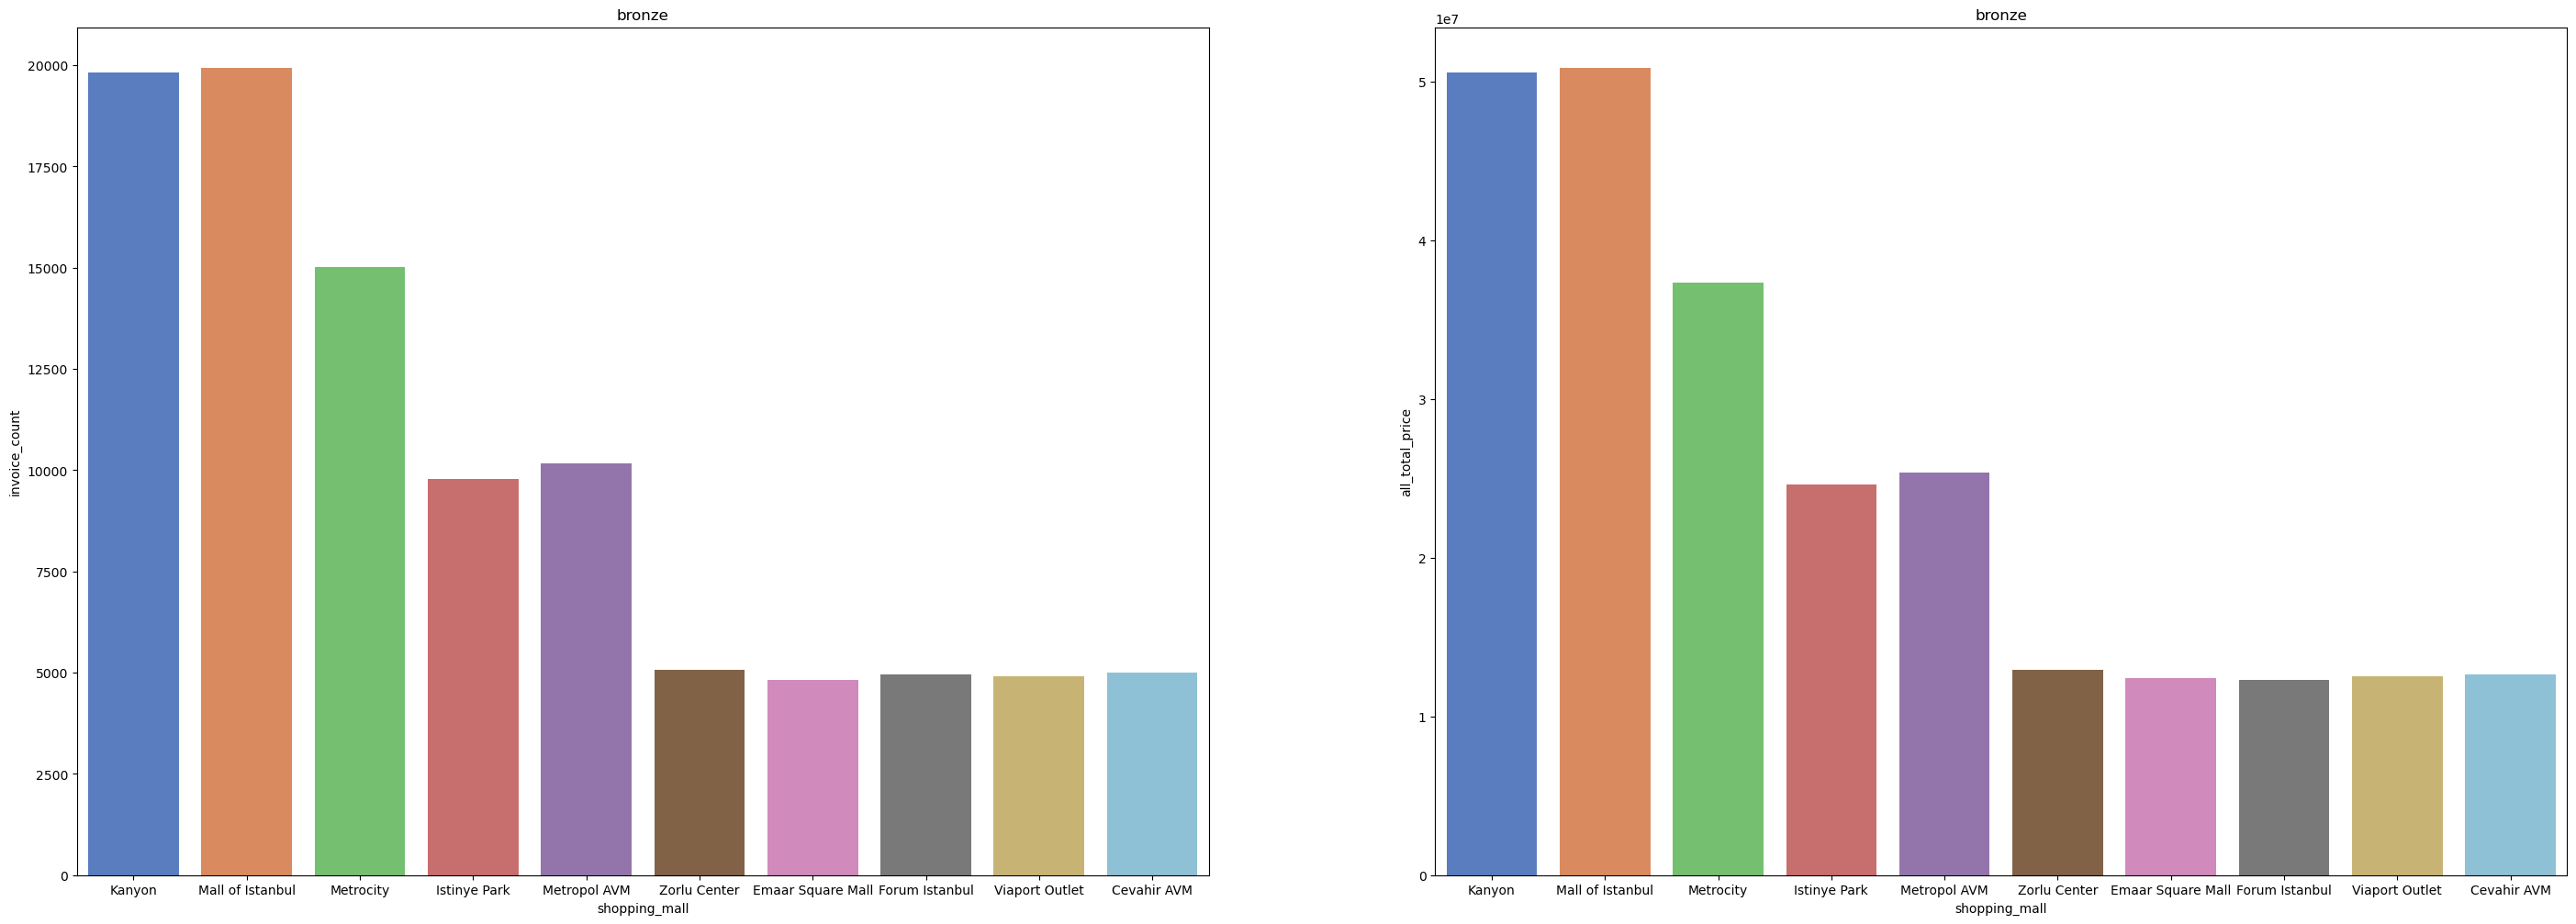

In [35]:
# 쇼핑몰 별 판매량 및 매출액 도식화
fig, axes = plt.subplots(1,2, figsize=(35,12))

sns.barplot(ax=axes[0], x='shopping_mall', y='invoice_count', data=rfm_df, palette='muted')
axes[0].set_title('bronze')
sns.barplot(ax=axes[1], x='shopping_mall', y='all_total_price', data=rfm_df, palette='muted')
axes[1].set_title('bronze')

#### 💡 분석
- 가장 높은 판매량을 기록한 쇼핑몰은 Istanbul(이스탄불)이 19943개를 판매하였으며, 가장 낮은 판매량을 기록한 쇼핑몰은 Emaar Square Mall(에마르 스퀘어 몰)이 4811개를 판매함.
- Istanbul 19943개, Kanyon 19823개, Metrocity 15011개, Metropol AVM	10161개, Istinye Park 9781개, Zorlu Center 5075개, Cevahir AVM 4991개, Forum Istanbul 4947개, Viaport Outlet 4914개, Emaar Square Mall 4811개 순으로 나타남.

#### 📌 시사점
- Istanbul(이스탄불)이 Kanyon(카뇽) 보다 판매량과 매출액이 더 우세하나 고객의 활동성에서 열세함. Istanbul(이스탄불)은 이탈 고객 비중이 Kanyon(카뇽) 보다 높은 것으로 판단되며, 고객 유지 및 복귀 관련 마케팅이 필요함.
- 하위 5개 쇼핑몰이 상위 5개 쇼핑몰에 비해 고객 활동성, 상품 판매량, 매출액이 현저히 열세함. 하위 5개 쇼핑몰의 현재 마케팅 전략은 제대로 추진되고 있지 않다고 판단되며, 고객 유지 및 상품 판매를 증대하기 위한 방안을 마련해야 함.

#### 📊 쇼핑몰 별 주요 고객 분석(성별)

In [36]:
cs_copy_df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

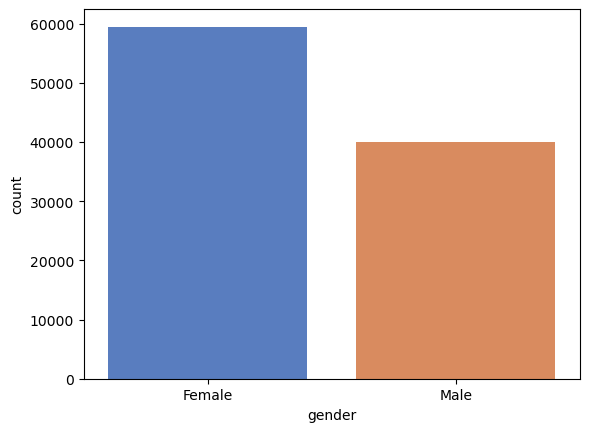

In [37]:
# 전체 성별 도식화
sns.countplot(x='gender', data=cs_copy_df, palette='muted')

In [38]:
rfm_df[['shopping_mall', 'Female', 'Male']]

,shopping_mall,Female,Male
0,Kanyon,11906,7917
1,Mall of Istanbul,11902,8041
2,Metrocity,8941,6070
3,Istinye Park,5874,3907
4,Metropol AVM,6144,4017
5,Zorlu Center,2968,2107
6,Emaar Square Mall,2842,1969
7,Forum Istanbul,3016,1931
8,Viaport Outlet,2949,1965
9,Cevahir AVM,2940,2051


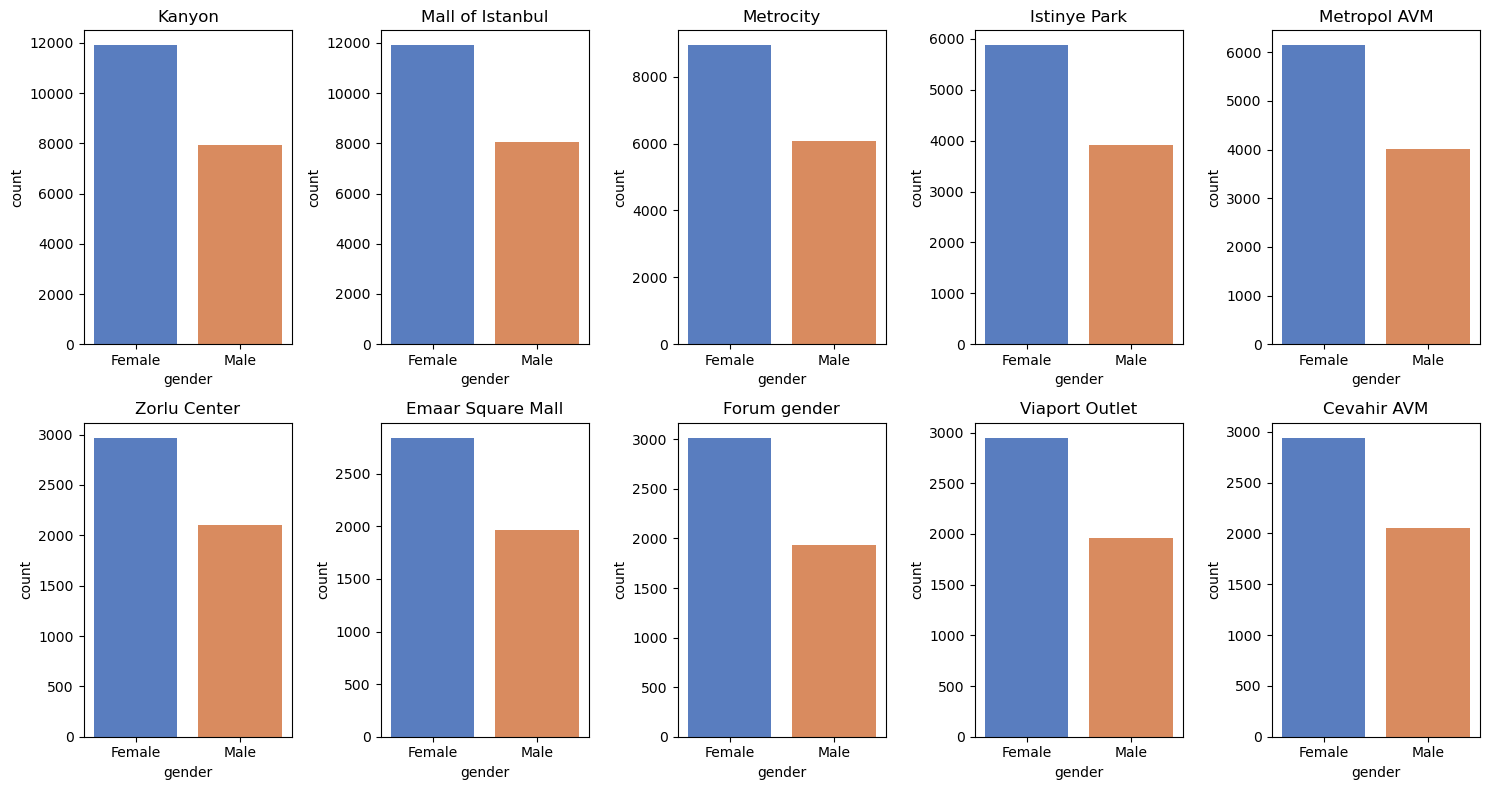

In [39]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

sns.barplot(ax=axes[0, 0], x='gender', y='count', data=Kanyon_shopping_gender, palette='muted')
axes[0, 0].set_title('Kanyon')
sns.barplot(ax=axes[0, 1], x='gender', y='count', data=Istanbul_shopping_gender, palette='muted')
axes[0, 1].set_title('Mall of Istanbul')
sns.barplot(ax=axes[0, 2], x='gender', y='count', data=Metrocity_shopping_gender, palette='muted')
axes[0, 2].set_title('Metrocity')
sns.barplot(ax=axes[0, 3], x='gender', y='count', data=Istinye_shopping_gender, palette='muted')
axes[0, 3].set_title('Istinye Park')
sns.barplot(ax=axes[0, 4], x='gender', y='count', data=Metropol_shopping_gender, palette='muted')
axes[0, 4].set_title('Metropol AVM')
sns.barplot(ax=axes[1, 0], x='gender', y='count', data=Zorlu_shopping_gender, palette='muted')
axes[1, 0].set_title('Zorlu Center')
sns.barplot(ax=axes[1, 1], x='gender', y='count', data=Emaar_shopping_gender, palette='muted')
axes[1, 1].set_title('Emaar Square Mall')
sns.barplot(ax=axes[1, 2], x='gender', y='count', data=Forum_shopping_gender, palette='muted')
axes[1, 2].set_title('Forum gender')
sns.barplot(ax=axes[1, 3], x='gender', y='count', data=Viaport_shopping_gender, palette='muted')
axes[1, 3].set_title('Viaport Outlet')
sns.barplot(ax=axes[1, 4], x='gender', y='count', data=Cevahir_shopping_gender, palette='muted')
axes[1, 4].set_title('Cevahir AVM')

plt.tight_layout()
plt.show()

#### 💡 분석
- 전체 쇼핑몰 고객 중 여성이 59482명으로 가장 많고, 남성이 39975명으로 가장 적음.
<br>

- Kanyon는 여성이 11906명, 남성이 7917명 순으로 나타남.
<br>

- Istanbul은 여성이 11902명, 남성이 8041명 순으로 나타남.
<br>

- Metrocity는 여성이 89416명, 남성이 6070명 순으로 나타남.
<br>

- Istinye Park는 여성이 5874명, 남성이 3907명 순으로 나타남.
<br>

- Metropol AVM은 여성이 6144명, 남성이 4017명 순으로 나타남.
<br>

- Zorlu Center는 여성이 2968명, 남성이 2107명 순으로 나타남.
<br>

- Emaar Square Mall은 여성이 2842명, 남성이 1969명 순으로 나타남.
<br>

- Forum Istanbul은 여성이 3016명, 남성이 1931명 순으로 나타남.
<br>

- Viaport Outlet은 여성이 2949명, 남성이 1965명 순으로 나타남.
<br>

- Cevahir AVM은 여성이 2940명, 남성이 2051명 순으로 나타남.

#### 📌 시사점
- 전체 쇼핑몰 모두 여성 고객의 비율이 크게 나타나고 있음. 현재 여성 고객을 대상으로한 마케팅 전략이 잘 추진되고 있다고 판단됨.
- 남성 고객의 비율은 여성보다 열세하므로 남성 고객 유입을 위한 방안을 마련해야 함.

#### 📊 쇼핑몰 별 주요 고객 분석(연령대)

In [40]:
cs_copy_df['age_to'].value_counts()

age_to
30    19287
20    19263
40    19153
60    19043
50    18931
10     3780
Name: count, dtype: int64

<Axes: xlabel='age_to', ylabel='count'>

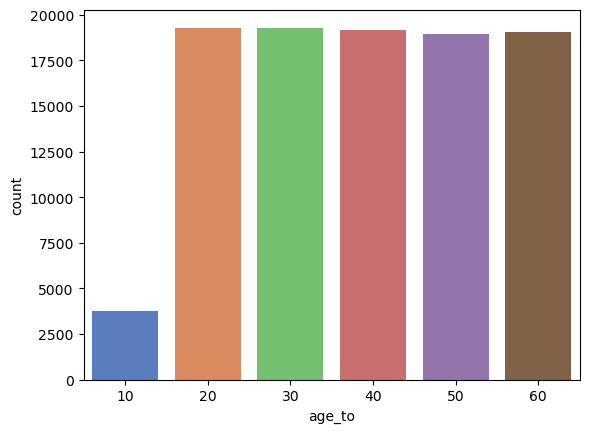

In [41]:
# 전체 성별 도식화
sns.countplot(x='age_to', data=cs_copy_df, palette='muted')

In [42]:
rfm_df[['shopping_mall', 10, 20, 30, 40, 50, 60]]

,shopping_mall,10,20,30,40,50,60
0,Kanyon,738,3796,3826,3894,3785,3784
1,Mall of Istanbul,741,3906,3852,3817,3779,3848
2,Metrocity,578,2885,2853,2916,2917,2862
3,Istinye Park,393,1903,1880,1867,1851,1887
4,Metropol AVM,374,2030,1995,1944,1918,1900
5,Zorlu Center,193,950,1001,964,1002,965
6,Emaar Square Mall,171,901,976,925,910,928
7,Forum Istanbul,205,941,957,926,927,991
8,Viaport Outlet,197,965,962,937,917,936
9,Cevahir AVM,190,986,985,963,925,942


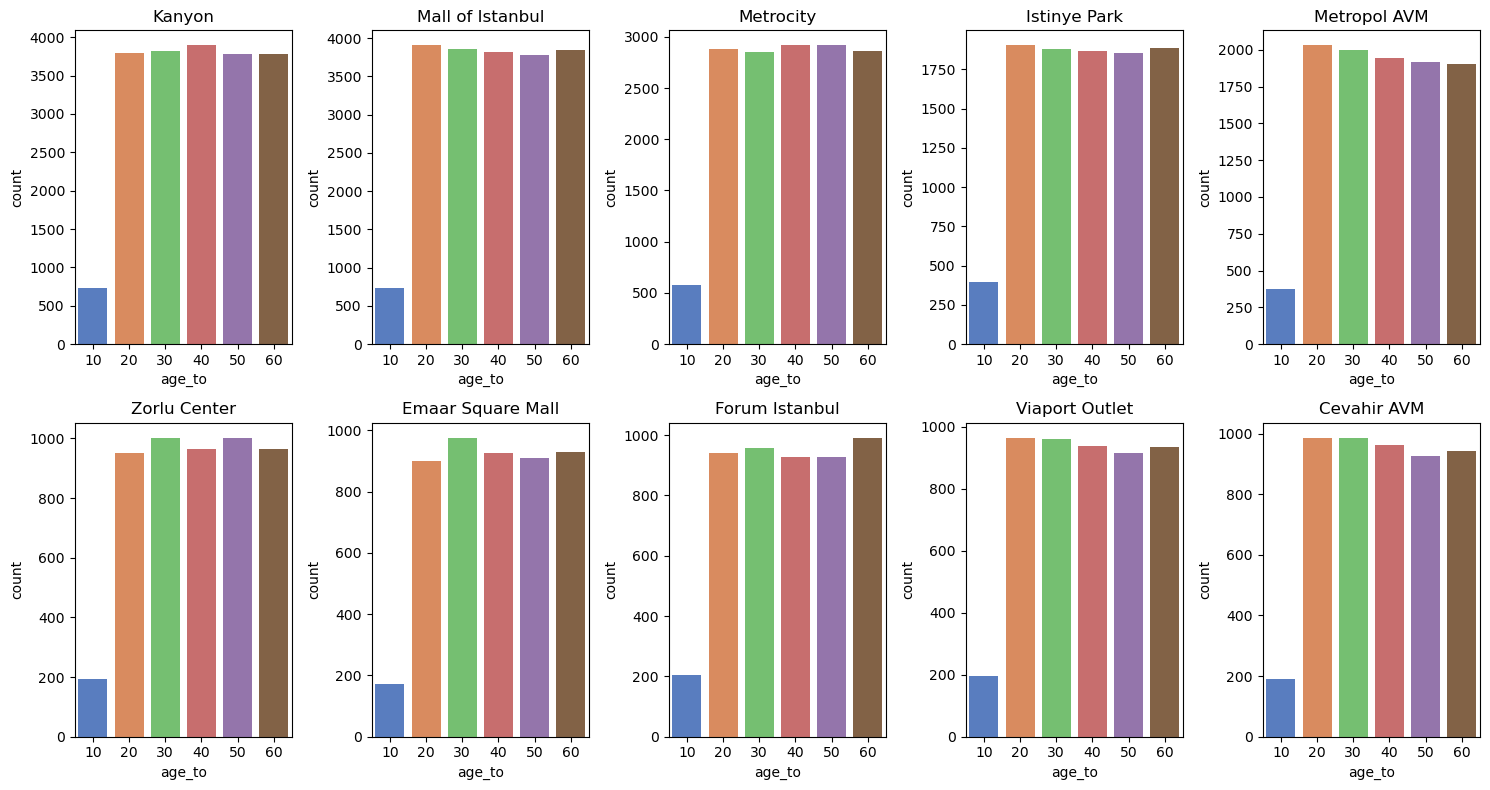

In [43]:
fig, axes = plt.subplots(2, 5, figsize=(15, 8))

sns.barplot(ax=axes[0, 0], x='age_to', y='count', data=Kanyon_shopping_age, palette='muted')
axes[0, 0].set_title('Kanyon')
sns.barplot(ax=axes[0, 1], x='age_to', y='count', data=Istanbul_shopping_age, palette='muted')
axes[0, 1].set_title('Mall of Istanbul')
sns.barplot(ax=axes[0, 2], x='age_to', y='count', data=Metrocity_shopping_age, palette='muted')
axes[0, 2].set_title('Metrocity')
sns.barplot(ax=axes[0, 3], x='age_to', y='count', data=Istinye_shopping_age, palette='muted')
axes[0, 3].set_title('Istinye Park')
sns.barplot(ax=axes[0, 4], x='age_to', y='count', data=Metropol_shopping_age, palette='muted')
axes[0, 4].set_title('Metropol AVM')
sns.barplot(ax=axes[1, 0], x='age_to', y='count', data=Zorlu_shopping_age, palette='muted')
axes[1, 0].set_title('Zorlu Center')
sns.barplot(ax=axes[1, 1], x='age_to', y='count', data=Emaar_shopping_age, palette='muted')
axes[1, 1].set_title('Emaar Square Mall')
sns.barplot(ax=axes[1, 2], x='age_to', y='count', data=Forum_shopping_age, palette='muted')
axes[1, 2].set_title('Forum Istanbul')
sns.barplot(ax=axes[1, 3], x='age_to', y='count', data=Viaport_shopping_age, palette='muted')
axes[1, 3].set_title('Viaport Outlet')
sns.barplot(ax=axes[1, 4], x='age_to', y='count', data=Cevahir_shopping_age, palette='muted')
axes[1, 4].set_title('Cevahir AVM')

plt.tight_layout()
plt.show()

#### 💡 분석
- 전체 쇼핑몰 고객 중 30대가 19287명으로 가장 많고, 10대가 3780명으로 가장 적음.
- 30대 19287명, 20대 19263명, 40대 19153명, 60대 19043명, 50대 18931명, 10대 3780명 순으로 나타남.
<br>

- Kanyon의 고객 중 40대가 3894명으로 가장 많고, 10대가 738명으로 가장 적음.
- 40대 3894명, 30대 3826명, 20대 3796명, 50대 3785명, 60대 3784명, 10대 738명 순으로 나타남.
<br>

- lstanbul의 고객 중 30대가 19287명으로 가장 많고, 10대가 3780명으로 가장 적음.
- 20대 3906명, 30대 3852명, 60대 3848명, 40대 3817명, 50대 3779명, 10대 741명 순으로 나타남.
<br>

- Metrocity의 고객 중 50대가 2917명으로 가장 많고, 10대가 578명으로 가장 적음.
- 50대 2917명, 40대 2916명, 20대 2885명, 60대 2862명, 30대 2853명, 10대 578명 순으로 나타남.
<br>

- Istinye Park의 고객 중 30대가 19287명으로 가장 많고, 10대가 3780명으로 가장 적음.
- 20대 1903명, 60대 1887명, 30대 1880명, 40대 1867명, 50대 1851명, 10대 393명 순으로 나타남.
<br>

- Metropol AVM의 고객 중 20대가 2030명으로 가장 많고, 10대가 374명으로 가장 적음.
- 20대 2030명, 30대 1995명, 40대 1944명, 50대 1918명, 60대 1900명, 10대 374명 순으로 나타남.
<br>

- Zorlu Center의 고객 중 50대가 1002명으로 가장 많고, 10대가 193명으로 가장 적음.
- 50대 1002명, 30대 1001명, 60대 965명, 40대 964명, 20대 950명, 10대 193명 순으로 나타남.
<br>

- Emaar Square Mall의 고객 중 30대가 976명으로 가장 많고,10대가 171명으로 가장 적음.
- 30대 976명, 60대 928명, 40대 925명, 50대 910명, 20대 901명, 10대 171명 순으로 나타남.
<br>

- Forum Istanbul의 고객 중 60대가 991명으로 가장 많고, 10대가 205명으로 가장 적음.
- 60대 991명, 30대 957명, 20대 941명, 50대 927명, 10대 205명 순으로 나타남.
<br>

- Viaport Outlet의 고객 중 20대가 965명으로 가장 많고, 10대가 197명으로 가장 적음.
- 20대 965명, 30대 962명, 40대 937명, 60대 936명, 50대 917명, 10대 197명 순으로 나타남.
<br>

- Cevahir AVM의 고객 중 20대가 986명으로 가장 많고, 10대가 190명으로 가장 적음.
- 20대 986명, 30대 985명, 40대 963명, 60대 942명, 50대 925명, 10대 190명 순으로 나타남.

#### 📌 시사점
- 전체 쇼핑몰 모두 고객의 연령대가 20대 ~ 60대로 균등하게 분포되어 있음. 20대 ~ 60대를 위한 마케팅 전략이 잘 추진된다고 판단됨.
- 10대 고객의 비율이 낮은 것으로 볼 때, 10대 고객의 유입이 저조하다 판단됨. 10대 고객 유입을 위한 마케팅 전략이 필요함.

#### 📊 쇼핑몰 별 품목 분석

In [44]:
display(all_df)

,category,category_Count
1,Clothing,34487
2,Cosmetics,15097
3,Food & Beverage,14776
7,Toys,10087
4,Shoes,10034
5,Souvenir,4999
6,Technology,4996
0,Books,4981


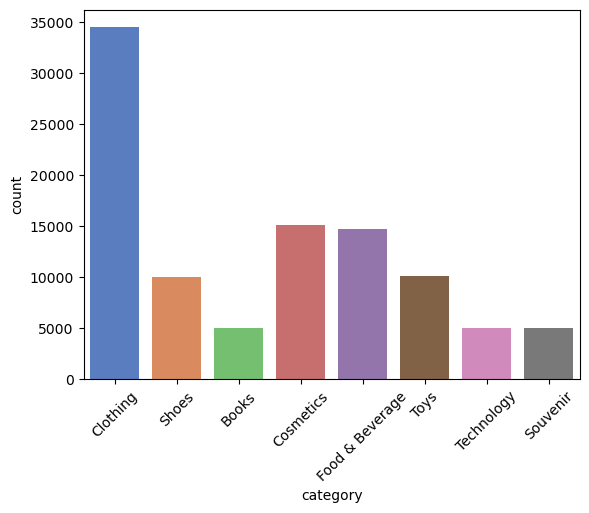

In [45]:
# 전체 성별 도식화
sns.countplot(x='category', data=cs_copy_df, palette='muted')
plt.xticks(rotation=45)
plt.show()

In [46]:
display(Kanyon_df)
display(Istanbul_df)
display(Metrocity_df)
display(Istinye_df)
display(Metropol_df)
display(Zorlu_df)
display(Emaar_df)
display(Forum_df)
display(Viaport_df)
display(Cevahir_df)

,shopping_mall,category,category_Count
0,Kanyon,Clothing,1729
1,Kanyon,Food & Beverage,772
2,Kanyon,Cosmetics,732
3,Kanyon,Toys,514
4,Kanyon,Shoes,490
5,Kanyon,Books,258
6,Kanyon,Technology,256
7,Kanyon,Souvenir,240


,shopping_mall,category,category_Count
0,Mall of Istanbul,Clothing,1651
1,Mall of Istanbul,Cosmetics,760
2,Mall of Istanbul,Food & Beverage,692
3,Mall of Istanbul,Shoes,498
4,Mall of Istanbul,Toys,464
5,Mall of Istanbul,Technology,263
6,Mall of Istanbul,Souvenir,247
7,Mall of Istanbul,Books,236


,shopping_mall,category,category_Count
0,Metrocity,Clothing,1729
1,Metrocity,Cosmetics,770
2,Metrocity,Food & Beverage,712
3,Metrocity,Toys,531
4,Metrocity,Shoes,458
5,Metrocity,Souvenir,261
6,Metrocity,Books,252
7,Metrocity,Technology,234


,shopping_mall,category,category_Count
0,Istinye Park,Clothing,3353
1,Istinye Park,Food & Beverage,1490
2,Istinye Park,Cosmetics,1458
3,Istinye Park,Toys,1015
4,Istinye Park,Shoes,1001
5,Istinye Park,Souvenir,515
6,Istinye Park,Technology,487
7,Istinye Park,Books,462


,shopping_mall,category,category_Count
0,Metropol AVM,Clothing,6840
1,Metropol AVM,Cosmetics,3023
2,Metropol AVM,Food & Beverage,2909
3,Metropol AVM,Shoes,2017
4,Metropol AVM,Toys,1987
5,Metropol AVM,Souvenir,1037
6,Metropol AVM,Books,1013
7,Metropol AVM,Technology,997


,shopping_mall,category,category_Count
0,Zorlu Center,Clothing,6923
1,Zorlu Center,Cosmetics,3050
2,Zorlu Center,Food & Beverage,2957
3,Zorlu Center,Shoes,2023
4,Zorlu Center,Toys,2000
5,Zorlu Center,Books,1025
6,Zorlu Center,Technology,1017
7,Zorlu Center,Souvenir,948


,shopping_mall,category,category_Count
0,Emaar Square Mall,Clothing,5268
1,Emaar Square Mall,Cosmetics,2265
2,Emaar Square Mall,Food & Beverage,2244
3,Emaar Square Mall,Toys,1515
4,Emaar Square Mall,Shoes,1457
5,Emaar Square Mall,Technology,772
6,Emaar Square Mall,Books,752
7,Emaar Square Mall,Souvenir,738


,shopping_mall,category,category_Count
0,Forum Istanbul,Clothing,3525
1,Forum Istanbul,Cosmetics,1541
2,Forum Istanbul,Food & Beverage,1517
3,Forum Istanbul,Shoes,1074
4,Forum Istanbul,Toys,1033
5,Forum Istanbul,Souvenir,531
6,Forum Istanbul,Books,476
7,Forum Istanbul,Technology,464


,shopping_mall,category,category_Count
0,Viaport Outlet,Clothing,1708
1,Viaport Outlet,Cosmetics,734
2,Viaport Outlet,Food & Beverage,733
3,Viaport Outlet,Toys,515
4,Viaport Outlet,Shoes,497
5,Viaport Outlet,Technology,256
6,Viaport Outlet,Books,246
7,Viaport Outlet,Souvenir,225


,shopping_mall,category,category_Count
0,Cevahir AVM,Clothing,1761
1,Cevahir AVM,Cosmetics,764
2,Cevahir AVM,Food & Beverage,750
3,Cevahir AVM,Shoes,519
4,Cevahir AVM,Toys,513
5,Cevahir AVM,Books,261
6,Cevahir AVM,Souvenir,257
7,Cevahir AVM,Technology,250


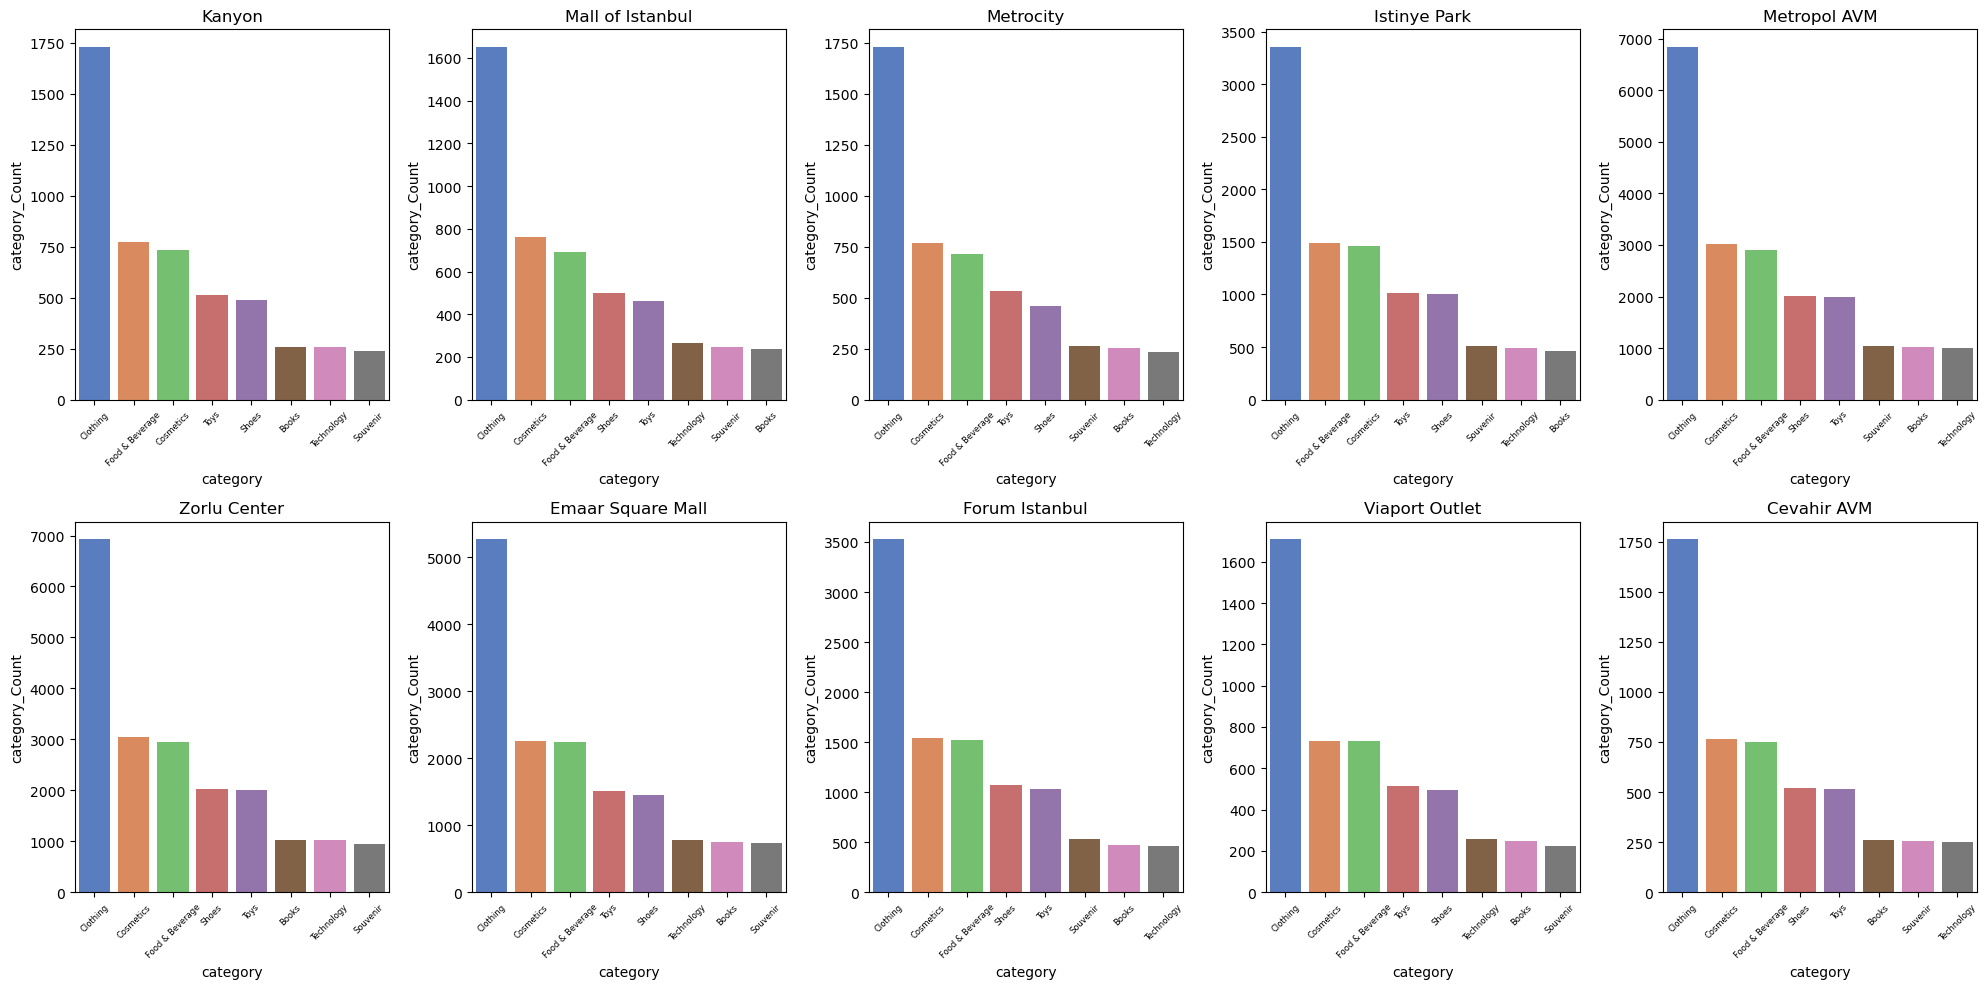

In [47]:
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

sns.barplot(ax=axes[0, 0], x='category', y='category_Count', data=Kanyon_df, palette='muted')
axes[0, 0].set_title('Kanyon')
axes[0, 0].tick_params(axis='x', rotation=45, labelsize=6)
sns.barplot(ax=axes[0, 1], x='category', y='category_Count', data=Istanbul_df, palette='muted')
axes[0, 1].set_title('Mall of Istanbul')
axes[0, 1].tick_params(axis='x', rotation=45, labelsize=6)
sns.barplot(ax=axes[0, 2], x='category', y='category_Count', data=Metrocity_df, palette='muted')
axes[0, 2].set_title('Metrocity')
axes[0, 2].tick_params(axis='x', rotation=45, labelsize=6)
sns.barplot(ax=axes[0, 3], x='category', y='category_Count', data=Istinye_df, palette='muted')
axes[0, 3].set_title('Istinye Park')
axes[0, 3].tick_params(axis='x', rotation=45, labelsize=6)
sns.barplot(ax=axes[0, 4], x='category', y='category_Count', data=Metropol_df, palette='muted')
axes[0, 4].set_title('Metropol AVM')
axes[0, 4].tick_params(axis='x', rotation=45, labelsize=6)
sns.barplot(ax=axes[1, 0], x='category', y='category_Count', data=Zorlu_df, palette='muted')
axes[1, 0].set_title('Zorlu Center')
axes[1, 0].tick_params(axis='x', rotation=45, labelsize=6)
sns.barplot(ax=axes[1, 1], x='category', y='category_Count', data=Emaar_df, palette='muted')
axes[1, 1].set_title('Emaar Square Mall')
axes[1, 1].tick_params(axis='x', rotation=45, labelsize=6)
sns.barplot(ax=axes[1, 2], x='category', y='category_Count', data=Forum_df, palette='muted')
axes[1, 2].set_title('Forum Istanbul')
axes[1, 2].tick_params(axis='x', rotation=45, labelsize=6)
sns.barplot(ax=axes[1, 3], x='category', y='category_Count', data=Viaport_df, palette='muted')
axes[1, 3].set_title('Viaport Outlet')
axes[1, 3].tick_params(axis='x', rotation=45, labelsize=6)
sns.barplot(ax=axes[1, 4], x='category', y='category_Count', data=Cevahir_df, palette='muted')
axes[1, 4].set_title('Cevahir AVM')
axes[1, 4].tick_params(axis='x', rotation=45, labelsize=6)

plt.tight_layout()
plt.show()

#### 💡 분석
※ 단위는 모두 '개'로 통일함.
<br><br>

- 전체 쇼핑몰 품목 중 Clothing가 34487개로 가장 많이 판매되었고, Books가 4981개로 가장 적게 판매됨.
- Clothing 34487개, Cosmetics 15097개, Food & Beverage 14776개, Toys 10087개, Shoes 10034개, Souvenir 4999개, Technology 4996개, Books 4981개 순으로 나타남.
<br>

- Kanyon의 품목 중 Clothing가 1729개로 가장 많이 판매되었고 Souvenir가 240개로 가장 적게 판매됨.
- Clothing 1729개, Food & Beverage 772개, Cosmetics 732개, Toys 514개, Shoes 490개, Books 258개, Technology 256개, Souvenir 240개 순으로 나타남.
<br>

- Mall of Istanbul의 품목 중 Clothing가 1651개로 가장 많이 판매되었고 Books가 236개로 가장 적게 판매됨.
- Clothing 1651개, Cosmetics 760개, Food & Beverage 692개, Shoes 498개, Toys 464개, Technology 263개, Souvenir 247개, Books 236개 순으로 나타남.
<br>

- Metrocity의 품목 중 Clothing가 1729개로 가장 많이 판매되었고 Technology가 234개로 가장 적게 판매됨.
- Clothing 1729개, Cosmetics 770개, Food & Beverage 712개, Toys 531개, Shoes 458개, Souvenir 261개, Books 252개, Technology 234개 순으로 나타남.
<br>

- Istinye Park의 품목 중 Clothing가 3353개로 가장 많이 판매되었고 Books가 462개로 가장 적게 판매됨.
- Clothing 3353개, Food & Beverage 1490개, Cosmetics 1458개, Toys 1015개, Shoes 1001개, Souvenir 515개, Technology 487개, Books 462개 순으로 나타남.
<br>

- Metropol AVM의 품목 중 Clothing가 6840개로 가장 많이 판매되었고 Technology가 997개로 가장 적게 판매됨.
- Clothing 6840개, Cosmetics 3023개, Food & Beverage 1458개, Shoes 2017개, Toys 1987개, Souvenir 1037개, Books 1013개, Technology 997개 순으로 나타남.
<br>

- Zorlu Center의 품목 중 Clothing가 6923개로 가장 많이 판매되었고 Souvenir가 948개로 가장 적게 판매됨.
- Clothing 6923개, Cosmetics 3050개, Food & Beverage 2957개, Shoes 2023개, Toys 2000개, Books 1025개, Technology 1017개, Souvenir 948개 순으로 나타남.
<br>

- Emaar Square Mall의 품목 중 Clothing가 5268개로 가장 많이 판매되었고 Souvenir가 738개로 가장 적게 판매됨.
- Clothing 5268개, Cosmetics 2265개, Food & Beverage 2244개, Toys 1515개, Shoes 1457개, Technology 772개, Books 752개, Souvenir 738개 순으로 나타남.
<br>

- Forum Istanbul의 품목 중 Clothing가 3525개로 가장 많이 판매되었고 Technology가 464개로 가장 적게 판매됨.
- Clothing 3525개, Cosmetics 1541개, Food & Beverage 1517개, Shoes 1074개, Toys 1033개, Souvenir 531개, Books 476개, Technology 464개 순으로 나타남.
<br>

- Viaport Outlet의 품목 중 Clothing가 1708개로 가장 많이 판매되었고 Souvenir가 225개로 가장 적게 판매됨.
- Clothing 1708개, Cosmetics 734개, Food & Beverage 733개개,Toyss5154개,Shoess4973개,Technologyr2561개, Books2466개,Souveniry2254개 순으로 나타남.
<br

- Cevahir AVM의 품목 중 Clothing가 1761개로 가장 많이 판매되었고 Technology가 250개로 가장 적게 판매됨.
- Clothing 1761개, Cosmetics 764개, Food & Beverage 750개, Shoes 519개, Toys 513개, Books 261개, Souvenir 257개, Technology 250개 순으로 나타남.>

#### 📌 시사점
- 전체 쇼핑몰에서 가장 판매량이 높은 품목은 Clothing으로 나타났으며, 해당 품목을 통한 마케팅 전략이 필요함.
- 전체 쇼핑몰에서 가장 판매량이 낮은 하위 3개 품목은 Books, Souvenir, Technology으로 해당 상품에 대한 개선 및 마케팅 전략이 필요하다고 판단됨.

### Ⅴ. 마케팅 전략 제안

1. 쇼핑몰 종합 순위에 따른 마케팅 전략
> - F(Frequency) 및 M(Monetary)은 우세하나 R(recency)이 낮은 쇼핑몰에서는 할인 및 복귀 등 고객을 유지 및 유입할 수 있는 다양한 프로모션을 진행하여 구매를 유도한다.
>
> - 종합 순위 하위 5개 쇼핑몰에서는 F(Frequency) 및 M(Monetary)을 증대하기 위해 맞춤형 광고를 제작하여 홍보를 강화하거나 수요가 높은 상품을 개선/개발하여 더 다양한 선택지를 제공하고, R(recency)을 위해 첫 구매 혜택, 복귀 혜택 등 신규 고객 유치와 기존 고객 유지를 위한 마케팅 방안을 마련한다.

<br>

2. 쇼핑몰 주요 고객층에 따른 마케팅 전략
> - 여성을 대상으로한 마케팅 전략이 잘 추진되고 있으며, 여성 고객의 R(recency)과 M(Monetary)를 유지하기 위해 여성 고객에게 인기 있는 상품들을 개선/개발하여 더 다양한 선택지를 제공해 만족도를 높이고 이탈을 방지한다.
>
> - 남성 고객의 유입을 위해 혜택 및 다양한 프로모션을 진행하여 R(recency)을 증가할 수 있도록 한다.

<br>

3. 쇼핑몰 품목 판매량에 따른 마케팅 전략
> - 쇼핑몰에서 가장 판매량이 높은 품목으로 광고를 제작하는 등 홍보를 강화하여 새로운 고객 유입을 유도하고 F(Frequency) 및 M(Monetary)를 증대할 수 있도록 한다.
>
> - 쇼핑몰에서 가장 판매량이 낮은 하위 3개 품목의 F(Frequency) 및 M(Monetary)를 증대하기 위해 상품들을 개선/개발하여 더 다양한 선택지를 제공해 만족도를 높이고 혜택을 제공한다.